### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции:
strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### Допзадание

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

Параметры differential_evolution по умолчанию:

In [3]:
# differential_evolution(func, bounds, args=(), strategy='best1bin', maxiter=1000, popsize=15, tol=0.01,
#                        mutation=0.5, 1, recombination=0.7, seed=None, callback=None, disp=False, polish=True,
#                        init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=())

Изменим:  
1) strategy с 'best1bin' на 'rand2bin'  
2) popsize с 15 на 10  
3) tol с 0.01 на 0.02  
4) mutation с 0.5 на 1 (должна быть in the range [0, 2])  
5) recombination с 0.7 на 0.5 (должен быть in the range [0, 1])  
6) updating с 'immediate' на 'deferred'

In [4]:
bounds = [(-10, 10), (-10, 10)]
result2 = differential_evolution(ackley, bounds, strategy='rand2bin', popsize=10, tol=0.02,
                       mutation=1, recombination=0.5, seed=42, updating='deferred')
result2

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 6783
     nit: 335
 success: True
       x: array([0., 0.])

Получили тот же результат, но число оценок целевых функций (nfev) и количество итераций (nit) заметно возросло

In [5]:
import matplotlib.pyplot as plt

<BarContainer object of 1 artists>

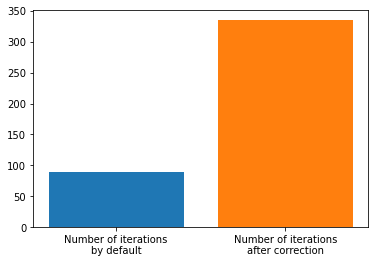

In [6]:
plt.bar('Number of iterations\nby default', result['nit'])
plt.bar('Number of iterations\nafter correction', result2['nit'])

<BarContainer object of 1 artists>

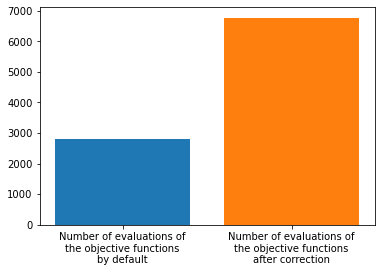

In [7]:
plt.bar('Number of evaluations of\nthe objective functions\nby default', result['nfev'])
plt.bar('Number of evaluations of\nthe objective functions\nafter correction', result2['nfev'])